### Imports

---

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from functions.data_filtering import process_data, remove_stream_response, save_to_csv, bandpass_filter, savitzky_golay_filter

### Parameters

---

In [3]:
# Specify the date for which the data will be processed
date = "2024-04-01"

# Set the file path to the data file
# The file name should match the date specified in the 'date' variable
file_path = "data/ehz-2024-04-01.mseed"

# Define the specific time of interest within the specified date
time = "04:00:00"

# This determines the time range (in seconds) around the specific time for data trimming
# The trimmed data will include data from (time - window_size/2) to (time + window_size/2)
window_size = 600  

# Specify the station code of the Raspberry
station = 'R716E'

# Name of the CSV file for storing the raw acceleration data
csv_file_name = "acceleration_data.csv"

# Name of the CSV file for storing the filtered acceleration data
filtered_csv_file_name = "filtered_acceleration_data.csv"

# Define the filter parameters for the bandpass filter
lowcut = 1.0
highcut = 10.0

# Specify the order of the Butterworth filter
order = 4

# Specify the window length for the Savitzky-Golay filter.
# Must be an odd integer
window_length = 11

# Specify the polynomial order for the Savitzky-Golay filter
# Must be less than the window length
polyorder = 4

### Functions

---

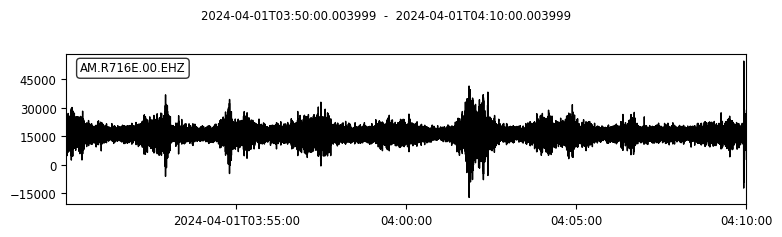

In [4]:
# View raw data
stream = process_data(date, time, window_size, file_path)
s_plot = stream.plot()

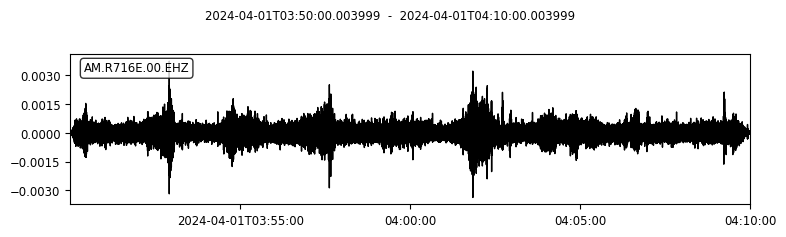

In [5]:
# Convert raw data into acceleration
resp_removed = remove_stream_response(stream, station)
rsr_plot = resp_removed.plot()

In [6]:
# Save acceleration data
save_to_csv(resp_removed, csv_file_name)

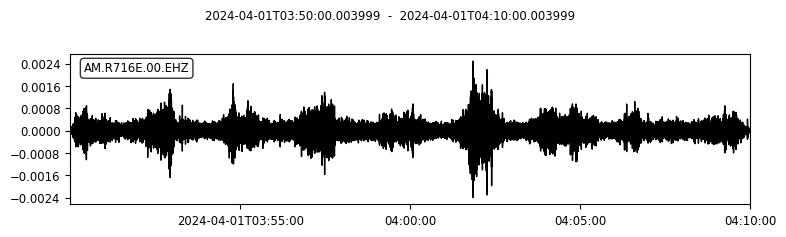

In [7]:
# Apply Butterworth filtering
filtered_stream_bandpass = bandpass_filter(resp_removed, lowcut, highcut, order)
fs_plot = filtered_stream_bandpass.plot()

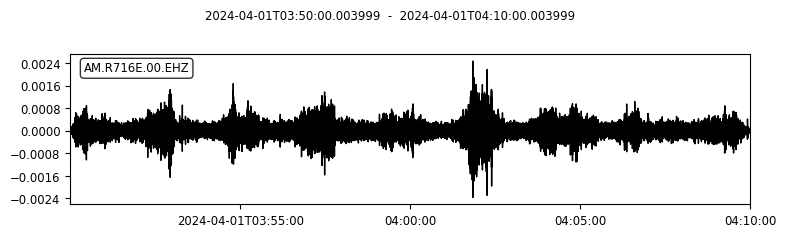

In [8]:
# Apply Savitzky–Golay filtering:
filtered_stream_sg = savitzky_golay_filter(filtered_stream_bandpass, window_length=window_length, polyorder=polyorder)
fss_plot = filtered_stream_sg.plot()

In [9]:
# Save filtered data
save_to_csv(filtered_stream_sg, filtered_csv_file_name)